# Exploring the Correlation Between COVID-19 Total Deaths and Median Age

## Introduction

In this project, I aim to investigate the relationship between the total deaths caused by COVID-19 and the median age of populations across different countries.

## Objective

My primary objective is to analyze the correlation between two key variables:

- **Total Deaths:** The cumulative number of deaths attributed to COVID-19 in various countries.
- **Median Age:** The median age of the population in each country.

## Tools and Libraries

- **Programming Language:** Python
- **Libraries:** Pandas, Matplotlib, Seaborn
- **Jupyter Notebook:** For interactive data exploration and documentation.

## Conclusion

With a correlation coefficient of 0.23, there appears to be a weak positive correlation between the total deaths caused by COVID-19 and the median age of the affected populations.

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the data
df = pd.read_csv('owid-covid-data.csv')

In [3]:
# Grab the last data entry for each location
df = df.sort_values(by='date', ascending=False)
indices = df.groupby('location')['date'].idxmax()
df = df.loc[indices]

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1505,AFG,Asia,Afghanistan,2024-02-18,231990.0,211.0,30.143,7982.0,0.0,0.000,...,NaN,37.746,0.50,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
3011,OWID_AFR,NaN,Africa,2024-02-18,13138904.0,109.0,15.571,259085.0,2.0,0.286,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
4517,ALB,Europe,Albania,2024-02-18,334863.0,0.0,0.000,3605.0,0.0,0.000,...,51.2,NaN,2.89,78.57,0.795,2.842318e+06,NaN,NaN,NaN,NaN
6023,DZA,Africa,Algeria,2024-02-18,272010.0,0.0,0.000,6881.0,0.0,0.000,...,30.4,83.741,1.90,76.88,0.748,4.490323e+07,NaN,NaN,NaN,NaN
7529,ASM,Oceania,American Samoa,2024-02-18,8359.0,0.0,0.000,34.0,0.0,0.000,...,NaN,NaN,NaN,73.74,NaN,4.429500e+04,NaN,NaN,NaN,NaN


In [5]:
# Selecting relevant columns
cols = ['total_cases', 'total_deaths', 'hospital_beds_per_thousand', 'life_expectancy', 'population', 'population_density', 'median_age', 'human_development_index']
df = df[cols]

In [6]:
# Dropping rows with NaN Values
df = df.dropna()
df.isna().sum()

total_cases                   0
total_deaths                  0
hospital_beds_per_thousand    0
life_expectancy               0
population                    0
population_density            0
median_age                    0
human_development_index       0
dtype: int64

In [7]:
df.dtypes

total_cases                   float64
total_deaths                  float64
hospital_beds_per_thousand    float64
life_expectancy               float64
population                    float64
population_density            float64
median_age                    float64
human_development_index       float64
dtype: object

In [8]:
# Changing the data types
df['total_cases'] = df['total_cases'].astype('int64')
df['total_deaths'] = df['total_deaths'].astype('int64')
df['population'] = df['population'].astype('int64')

In [9]:
df.head()

,total_cases,total_deaths,hospital_beds_per_thousand,life_expectancy,population,population_density,median_age,human_development_index
1505,231990,7982,0.50,64.83,41128772,54.422,18.6,0.511
4517,334863,3605,2.89,78.57,2842318,104.871,38.0,0.795
6023,272010,6881,1.90,76.88,44903228,17.348,29.1,0.748
13553,9106,146,3.80,77.02,93772,231.845,32.1,0.778
15063,10084295,130573,5.00,76.67,45510324,16.177,31.9,0.845


In [10]:
# Getting the correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,total_cases,total_deaths,hospital_beds_per_thousand,life_expectancy,population,population_density,median_age,human_development_index
total_cases,1.000000,0.540579,0.301336,0.269584,0.818599,0.006203,0.315144,0.253759
total_deaths,0.540579,1.000000,0.153375,0.193660,0.307472,-0.052710,0.229033,0.216674
hospital_beds_per_thousand,0.301336,0.153375,1.000000,0.450275,0.024745,0.000657,0.656537,0.581058
life_expectancy,0.269584,0.193660,0.450275,1.000000,0.032512,0.171170,0.835786,0.908933
population,0.818599,0.307472,0.024745,0.032512,1.000000,-0.021657,0.062964,-0.001744
population_density,0.006203,-0.052710,0.000657,0.171170,-0.021657,1.000000,0.144544,0.155368
median_age,0.315144,0.229033,0.656537,0.835786,0.062964,0.144544,1.000000,0.884458
human_development_index,0.253759,0.216674,0.581058,0.908933,-0.001744,0.155368,0.884458,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

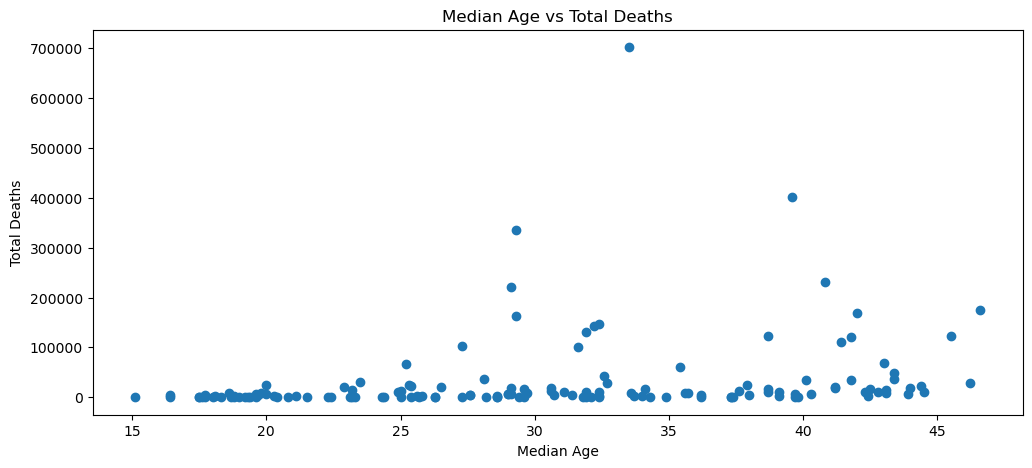

In [11]:
# Scatter plot with median age vs deaths
plt.figure(figsize=(12, 5))
plt.scatter(x=df['median_age'], y=df['total_deaths'])
plt.title('Median Age vs Total Deaths')
plt.xlabel('Median Age')
plt.ylabel('Total Deaths')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

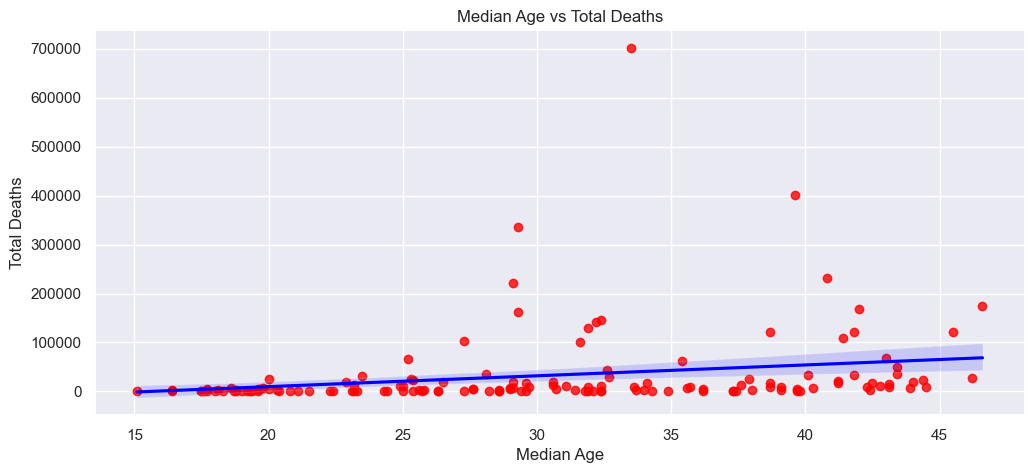

In [12]:
# Regression plot to view correlation
sns.set(rc={'figure.figsize':(12, 5)})
sns.regplot(x='median_age', y='total_deaths', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Median Age vs Total Deaths')
plt.xlabel('Median Age')
plt.ylabel('Total Deaths')
plt.show

<Axes: >

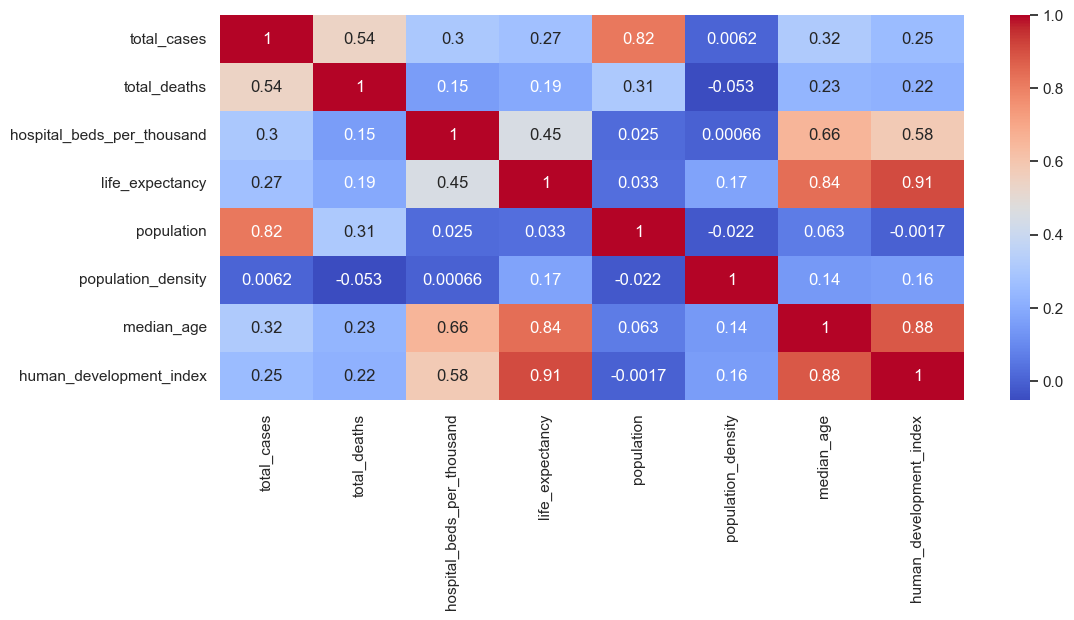

In [13]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')